In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # this and above will make the figures large enough to read

In [2]:
# load data
# Faces database is a processed version of the Yale Face Database B
# I acquired it from Serge Belongie at Cornell Tech through his webpage

data = []
with open('./faces/train.txt') as trainf:
    for line in trainf:
        image = plt.imread(line.strip().split()[0])
        data.append(image.reshape(2500,1)) # reshape 50-by-50 image to vector
data = np.array(data)[:,:,0]

In [3]:
def drawimg(v,ax=None):
    if ax is None:
        ax = plt # same commands exist there
    ax.imshow(v.reshape((50,50)),cmap=cm.gray)
    ax.tick_params(left=False,bottom=False,labelleft=False,labelbottom=False)

In [4]:
mean = np.mean(data,axis=0)
X = data - mean
print(X.shape) # in this case there are 540 examples of 2500-dimensional vectors (2500 pixels in an image)

(540, 2500)


In [5]:
U,D,VT = np.linalg.svd(X) # rows of VT are the eigenvectors of X.T@X
# D are the singular values, but not in a sorted order
print(U.shape,D.shape,VT.shape)

(540, 540) (540,) (2500, 2500)


In [6]:
indorder = np.argsort(-D) # find order of singular values
D = D[indorder] # remap
V = VT[indorder,:].T
print(V.shape)

(2500, 540)


total std dev:  11.831534120847463
11.831534120847463


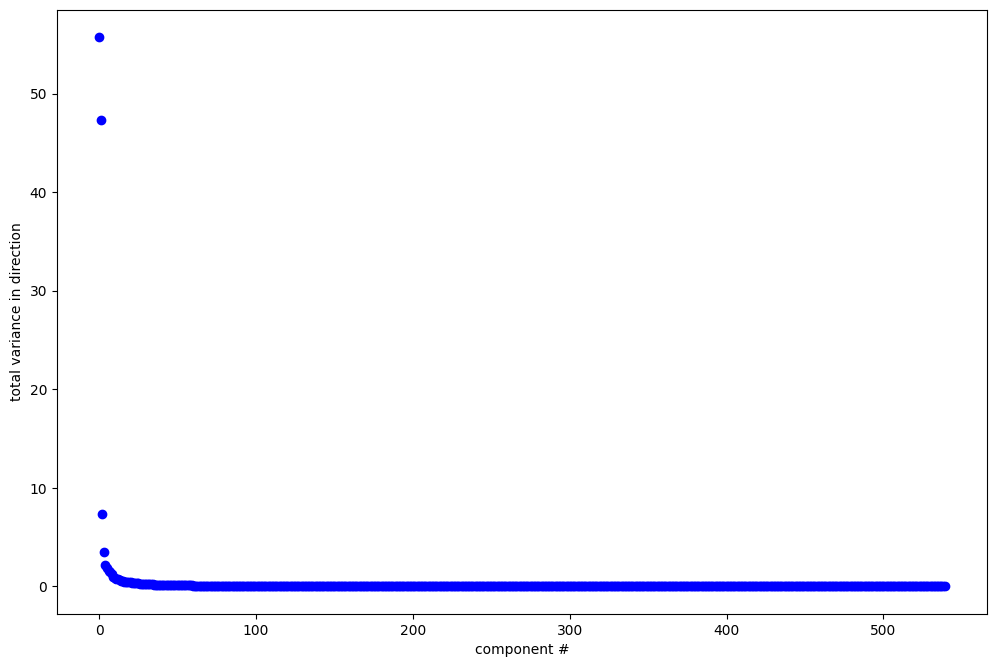

In [7]:
print('total std dev: ',np.sqrt(np.diag(X.T@X).sum()/X.shape[0]))
plt.plot((D**2)/X.shape[0],'bo')
plt.ylabel('total variance in direction')
plt.xlabel('component #')
print(np.sqrt((D**2).sum()/X.shape[0])) # should be the same

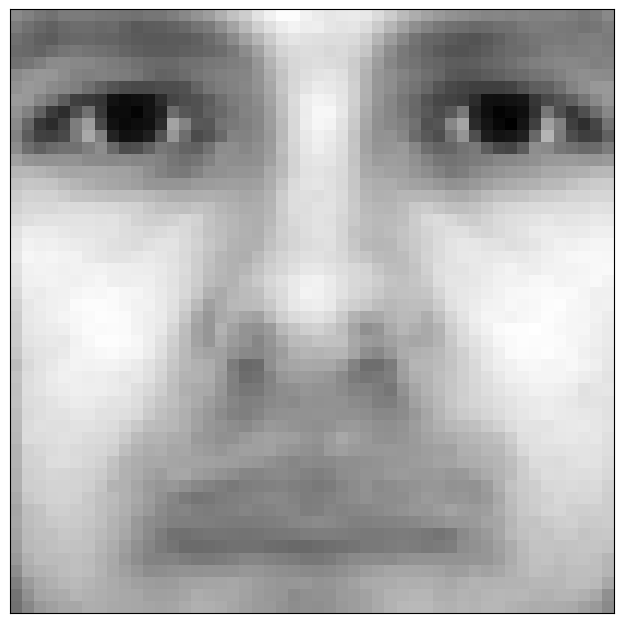

In [8]:
drawimg(mean) # Mean image

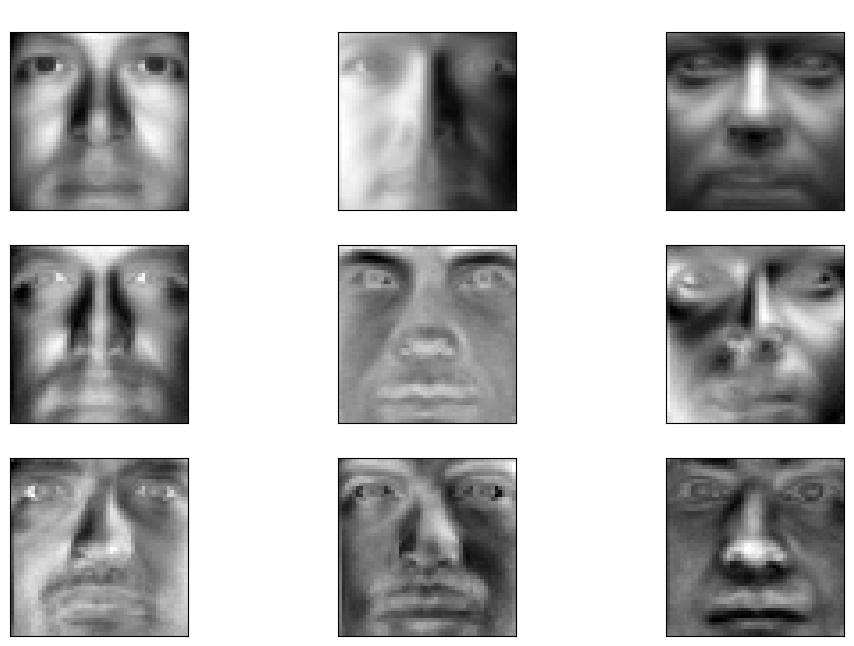

In [9]:
f,axs = plt.subplots(3,3)
axs = axs.reshape((9,))
for i in range(9):
    drawimg(V[:,i],axs[i])
    axs[i].set_title(f'std. dev: {D[i]/X.shape[0]:.3g}',color='white')

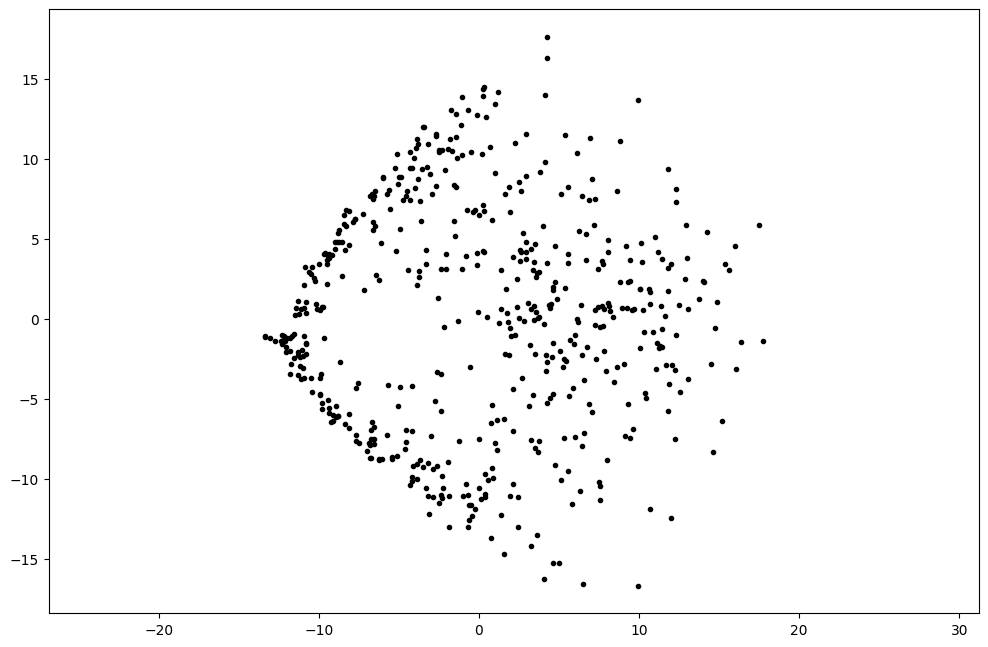

In [10]:
Z = X@V
plt.plot(Z[:,0],Z[:,1],'k.')
_ = plt.axis('equal')

In [11]:
def plot1(i,axs):
    drawimg(X[i,:],axs[0])
    axs[0].set_title('original image')
    axs[1].plot(Z[:,0],Z[:,1],'k.')
    z = Z[i,:]
    axs[1].plot(z[0],z[1],'ro')
    axs[1].set_title('principal components')
    axs[1].axis('equal')
    reconst = mean + V[:,0:2]@z[0:2]
    drawimg(reconst,axs[2])
    axs[2].set_title('reconstruction w/ 2')
    reconst = mean + V[:,0:10]@z[0:10]
    drawimg(reconst,axs[3])
    axs[3].set_title('reconstruction w/ 10')

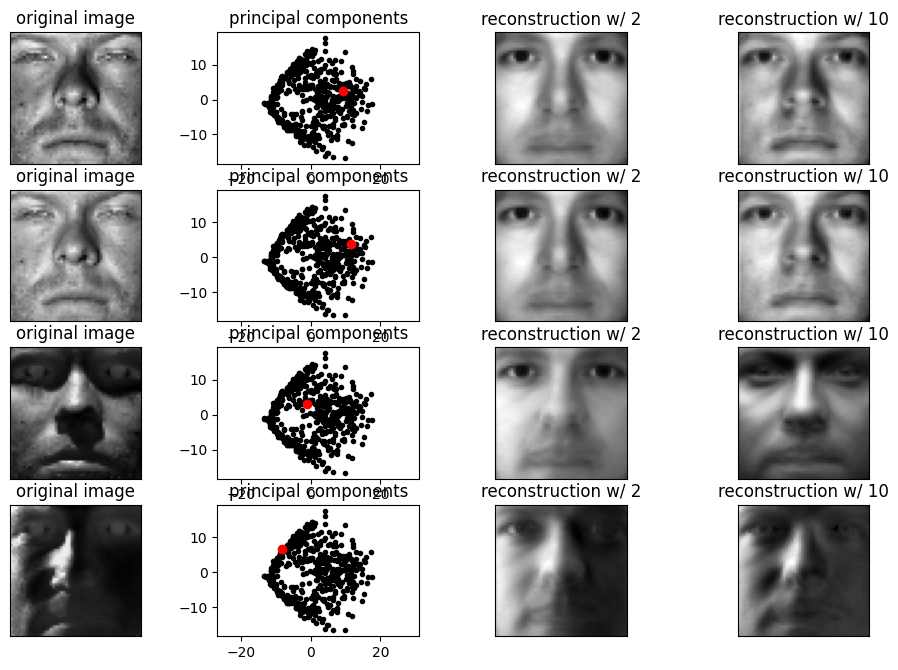

In [12]:
f,axs = plt.subplots(4,4)
for j in range(4):
    i = np.random.randint(X.shape[0])
    plot1(i,axs[j,:])